In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [15]:
def read_file():
    img = cv2.imread("C:\\Users\\rupali singh\\Downloads\\face images\\Humans")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img


## The cv2.cvtColor () method is used to convert an image from one color space to another

In [16]:
#plt.imshow("C:\\Users\\rupali singh\\Downloads\\archive (5)\\Humans\\1 (10).png")

In [27]:
filename ="C:\\Users\\rupali singh\\Downloads\\us.jpeg"
img = plt.imread(filename)
plt.show(filename)
org_img = np.copy(img)

## create edge mask

In [28]:
def edge_mask(img,line_size,blur_value):
    """
    input: input scale image
    output: edges of images
    """
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray,blur_value)
    edge = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
    return edge

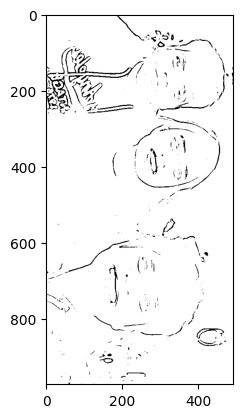

In [29]:
# linesize for thickness
line_size,blur_value = 7,7
edges = edge_mask(img,line_size,blur_value)
plt.imshow(edges, cmap="gray")

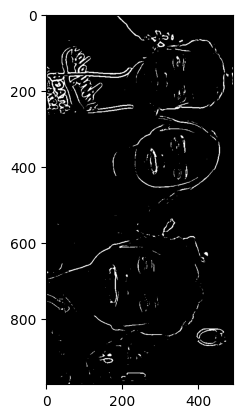

In [30]:
# linesize for thickness
line_size,blur_value = 7,7
edges = edge_mask(img,line_size,blur_value)
# if you give it binary it will print in two color
plt.imshow(edges, cmap="binary")

## reduce the color palette
using this if we dont want to focus on other color in image nd only want to focus on some particular color

In [31]:
def color_quantization(img,k):
    # k is a variable which is use for how many color you want to use
    #transform the image
    data = np.float32(img).reshape((-1,3))
    # determine the criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    # implementing K-Means clustering
    ret, label, center = cv2.kmeans(data,k,None, criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

In [32]:
#color_quantization(img,6)

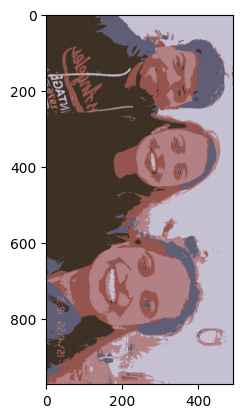

In [33]:
img_quantiz = color_quantization(img, k=5)
plt.imshow(img_quantiz)
plt.show()
    

#plt.imshow(img_quantiz,vmin=0, vmax=255)
#plt.imshow((out * 255).astype(np.uint8))
#Image = np.clip(img_quantiz, 0, 1)
#plt.imshow(Image)
#plt.imshow(img.astype("uint8"))



## combine edge mask with the quantize img

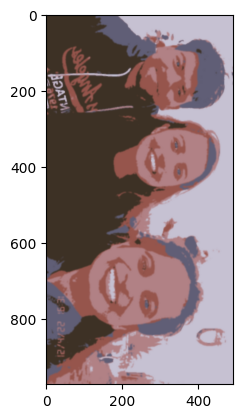

In [34]:
# reduce the noise
blurred = cv2.bilateralFilter(img_quantiz, d=7,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [35]:
def cartoon():
    c= cv2.bitwise_and(blurred,blurred,mask=edges)
    plt.imshow(c)
    plt.title("cartoonified image")
    plt.show()
    plt.imshow(org_img)
    plt.title("org_img")
    plt.show()

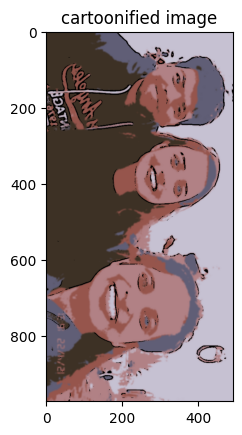

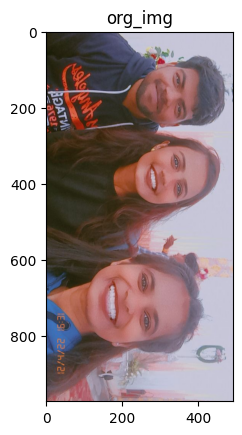

In [36]:
cartoon ()